# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [19]:
from prettytable import PrettyTable

In [20]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    prev = 1
    i = 0
    while i < maxiter and abs(prev - x0) > eps:
        prev = x0
        x0 = x0 - f(x0) / fder(x0)
        i += 1
    return x0

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [21]:
def f(x):
    return x ** 2 - 1

def deriv(x):
    return 2 * x

print(newton_iteration(f, deriv, -2))
print(newton_iteration(f, deriv, 500))
print(newton_iteration(f, deriv, 9000000))

-1.000000000000001
1.0000000000000118
1.0000000000002227


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [22]:
def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):
    prev = x0 + 1
    i = 0
    while i < maxiter and abs(prev - x0) > eps:
        prev = x0
        x0 = x0 - m * f(x0) / fder(x0)
        i += 1
    return x0, i

def f1(x):
    return (x ** 2 - 1) ** 2

def deriv1(x):
    return 4 * x **3 - 4 * x

table1 = PrettyTable(['Roots', 'Iterations'])
for i in range(1, 6):
    table1.add_row(modified_newton_iteration(f1, deriv1, 5.5, i))
print(table1)

+--------------------+------------+
|       Roots        | Iterations |
+--------------------+------------+
| 1.0000072727487044 |     22     |
|        1.0         |     7      |
| 0.9999978414244756 |     18     |
| 5.500000000000006  |    1000    |
| 1.1413567128712572 |    1000    |
+--------------------+------------+


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [23]:
import matplotlib.pyplot as plt
import numpy as np

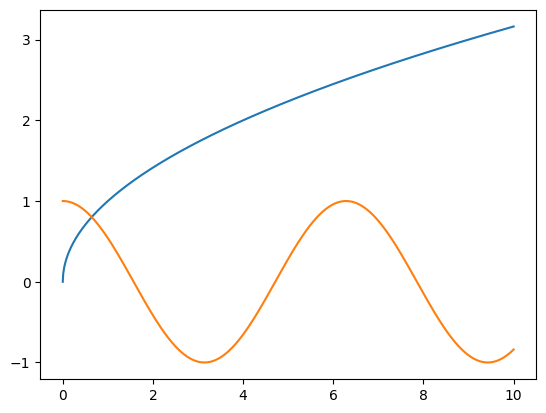

In [24]:
x1 = np.linspace(0, 10, 1000)
x2 = np.linspace(0, 10, 1000)
y1 = [np.sqrt(i) for i in x1]
y2 = [np.cos(i) for i in x2]
plt.plot(x1, y1, x2, y2)


In [45]:
def eq(x):
    return np.sqrt(x) - np.cos(x)

def fixed_point(f, x0, eps=10e-5, maxiter=1000, alpha=1):
    i = 0
    prev = x0 + 1
    while abs(prev - x0) > eps and i < maxiter:
        prev = x0
        x0 = x0 - alpha * f(x0)
        i += 1
    return x0, i
# fixed_point(eq, 1, eps=10e-10)
print(eq(1.0234453278375))
# for alpha in np.linspace(0.5, 2, 11):
#     print(fixed_point(eq, 5, eps=10e-5, alpha=alpha))

0.4912276880278058


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.